# MicroGrade from Scratch

 We learned that PyTorch Engine is doing gradients automatic<br>
 This helped us build very large graph and stop worrying about gradients

In [18]:
def f(a,b):
  c=a*b
  return c
f(5,3)

15

<strong>this graph is represent this simple fanction and can represent any function in tha same way</strong> <br><br><br>
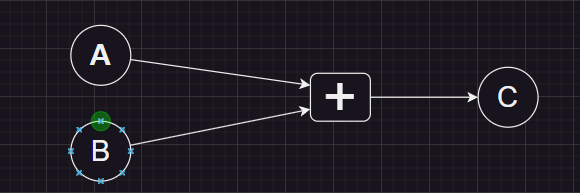

i will try to bulid class to allow represent any funtion by graph to easy to make backpropagation on it 

In [50]:
class Value():
  def __init__(self, data):
    self.data=data
  def __repr__(self) :
    return f"value is {self.data}"
  
 

In [51]:
a=Value(5)
print(a)
b=Value(6)
print(b)

value is 5
value is 6


In [55]:
# if try to add them 
try:
     a+b
except:
     print("can't make add between object befor define it in class")


can't make add between object befor define it in class


can't make add between object befor define it in class  

In [56]:
# edit on class to add add operation 
class Value():
  def __init__(self, data):
    self.data=data
  def __repr__(self) :
    return f"value is {self.data}"
  def __add__(self, other):
    return Value(self.data+other.data)

In [58]:
a=Value(5)
print(a)
b=Value(6)
print(b)
c=a+b
print(c)


value is 5
value is 6
value is 11


i will try to know child and operation make on child to get each vale

In [64]:
# edit to class to allow to tracing child and operation that give new value 
class Value():
  def __init__(self, data,child=set(),operation=None):
    self.data=data # data in each variable
    self.child=child # set of child varable that give this value
    self.operation=operation# set of operation done on chile to get value
  def __repr__(self) :
    return f"value is {self.data}"
  def __add__(self, other):
    return Value(self.data+other.data,child=set([self, other]),operation="+")

In [69]:
a=Value(5)
print(a)
b=Value(6)
print(b)
c=a+b
print(c)
print(f"child of c is {c.child} and make operation {c.operation} on this value")

value is 5
value is 6
value is 11
child of c is {value is 5, value is 6} and make operation + on this value


In [71]:
d=Value(6)
g=c+d
print(d)
print(f"child of c is {c.child} and make operation {c.operation} on this value")


value is 6
child of c is {value is 5, value is 6} and make operation + on this value


In [73]:
# if try to multi them 
try:
     a*b
except:
     print("can't make multi between object befor define it in class")

can't make multi between object befor define it in class


In [96]:
# edit to class to define multi and devied
class Value():
  def __init__(self, data,child=set(),operation=None,label=""):
    self.data=data # data in each variable
    self.child=child # set of child varable that give this value
    self.operation=operation# set of operation done on chile to get value
    self.label=label
  def __repr__(self) :
    return f"{self.label} is {self.data}"
  def __add__(self, other):
    return Value(self.data+other.data,child=set([self, other]),operation="+",label="")
  def __sub__(self, other):
    return Value(self.data-other.data,child=set([self, other]),operation="-",label="")
  def __mul__(self, other):
    return Value(self.data*other.data,child=set([self, other]),operation="*",label="")
 


In [101]:
#simple function 
def f(x,y,z):
  return (x+y)*z
x=Value(5);x.label="x"
y=Value(5);y.label="y"
z=Value(5);z.label="z"
c=f(x,y,z);c.label="c"
c

c is 50

<strong>what's derivative:</strong> <br>
The derivative of a function describes the function's instantaneous rate of change at a certain point. <br>
Another common interpretation is that the derivative gives us the slope of the line tangent to the function's graph at that point.


<strong>let's get gradient of it equation manualy</strong><br><br><br>
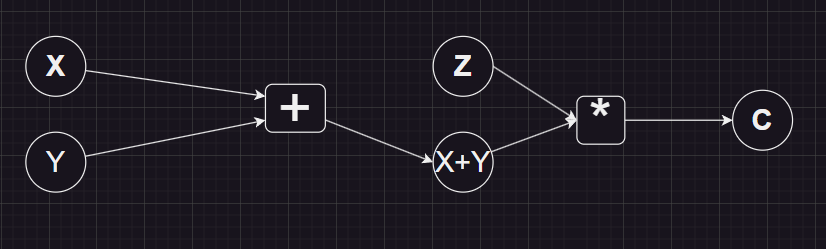


one  way to compute derivative <br>
**c= z* (x+y)* <br>
dc/dx=??<br>
dc/dx=dc/d(x+y) * d(x+y)/dx   # chain rule <br>
dc/d(x+y)=z<br>
d(x+y)/dx=1<br>
<br>
*dc/dx= z * 1 = z* <br>

In [119]:
# another way to compute derivative 
def f(x,y,z):
  q=(x+y);q.label="q"
  return q*z
h=0.001 # small change on function 


x=Value(5);x.label="x"
y=Value(5);y.label="y"
z=Value(5);z.label="z"
c=f(x,y,z);c.label="c"

x2=Value(5+h);x2.label="x2"
y2=Value(5);y2.label="y2"
z2=Value(5);z2.label="z2"
c2=f(x2,y2,z2);c2.label="c2"
derivative=(c2-c)*(1/h)
print(derivative)

AttributeError: 'float' object has no attribute 'data'

In [120]:
# edit to class allow to + or * or -  with number not instance from object 
class Value():
  def __init__(self, data,child=set(),operation=None,label=""):
    self.data=data # data in each variable
    self.child=child # set of child varable that give this value
    self.operation=operation# set of operation done on chile to get value
    self.label=label
  def __repr__(self) :
    return f"{self.label} is {self.data}"
  def __add__(self, other):
    if not isinstance(other,Value):
      return Value(self.data+other,child=set([self,Value(other)]),operation="+",label="")
    return Value(self.data+other.data,child=set([self, other]),operation="+",label="")
  def __sub__(self, other):
    if not isinstance(other,Value):
      return Value(self.data-other,child=set([self,Value(other)]),operation="-",label="")
    return Value(self.data-other.data,child=set([self, other]),operation="-",label="")
  def __mul__(self, other):
    if not isinstance(other,Value):
      return Value(self.data*other,child=set([self,Value(other)]),operation="*",label="")
    return Value(self.data*other.data,child=set([self, other]),operation="*",label="")


In [121]:
# another way to compute derivative 
def f(x,y,z):
  q=(x+y);q.label="q"
  return q*z
h=0.001 # small change on function 


x=Value(5);x.label="x"
y=Value(5);y.label="y"
z=Value(5);z.label="z"
c=f(x,y,z);c.label="c"

x2=Value(5+h);x2.label="x2"
y2=Value(5);y2.label="y2"
z2=Value(5);z2.label="z2"
c2=f(x2,y2,z2);c2.label="c2"
derivative=(c2-c)*(1/h)
print(derivative)

 is 5.000000000009663


In [140]:
# edit to class to save grade 
class Value():
  def __init__(self, data,child=set(),operation=None,label=""):
    self.data=data # data in each variable
    self.child=child # set of child varable that give this value
    self.operation=operation# set of operation done on chile to get value
    self.label=label
    self.grade=0
  def __repr__(self) :
    return f"{self.label} is {self.data}"
  def __add__(self, other):
    self.grade+=1
    other.grade+=1
    if not isinstance(other,Value):
      return Value(self.data+other,child=set([self,Value(other)]),operation="+",label="")
    return Value(self.data+other.data,child=set([self, other]),operation="+",label="")
    
  def __sub__(self, other):
    self.grade+=1
    other.grade+=1
    if not isinstance(other,Value):
      return Value(self.data-other,child=set([self,Value(other)]),operation="-",label="")
    return Value(self.data-other.data,child=set([self, other]),operation="-",label="")
  def __mul__(self, other):
    self.grade+=other.data
    other.grade+=self.data
    if not isinstance(other,Value):
      return Value(self.data*other,child=set([self,Value(other)]),operation="*",label="")
    return Value(self.data*other.data,child=set([self, other]),operation="*",label="")

In [145]:
x=Value(5);x.label="x"
y=Value(5);y.label="y"
z=Value(5);z.label="z"
q=x+y;q.label="x+y"
c=z*q;c.label="c"
c.grade=1
print(c.grade)
print(x.grade)
x.grade=q.grade*x.grade
print(x.grade)

1
1
5


In [192]:
# edit to class to add tanh and sigmoid and eponential
import math
class Value():
  def __init__(self, data,child=set(),operation=None,label="",grade=0):
    self.data=data # data in each variable
    self.child=child # set of child varable that give this value
    self.operation=operation# set of operation done on chile to get value
    self.label=label
    self.grade=grade
  def __repr__(self) :
    return f"{self.label} is {self.data}"
  def __add__(self, other):
    self.grade+=1 
    other.grade+=1
    if not isinstance(other,Value):
      return Value(self.data+other,child=set([self,Value(other)]),operation="+",label="")
    return Value(self.data+other.data,child=set([self, other]),operation="+",label="")
    
  def __sub__(self, other):
    self.grade+=1
    other.grade+=1
    if not isinstance(other,Value):
      return Value(self.data-other,child=set([self,Value(other)]),operation="-",label="")
    return Value(self.data-other.data,child=set([self, other]),operation="-",label="")
  def __mul__(self, other):
   
    if not isinstance(other,Value):
      return Value(self.data*other,child=set([self,Value(other)]),operation="*",label="")
    self.grade+=other.data
    other.grade+=self.data
    return Value(self.data*other.data,child=set([self, other]),operation="*",label="")
  def tanh(self):
    out=(math.exp(self.data*2)-1)*1/(math.exp(self.data*2)+1)
    self.grade=1 - out**2
    return Value(out,child=set([self]),operation="tanh",label="")


In [193]:
x=Value(5)
c=x.tanh();c.label="c"
print(c)
print(c.grade)
print(x.grade)

c is 0.9999092042625951
0
0.0001815832309438603


In [194]:
x=Value(5)
c=x.tanh();c.label="c"

h=0.001

x2=Value(5+h)
c2=x2.tanh();c.label="c2"
derivative=(c2-c)*(1/h)
derivative

 is 0.00018140178514869376

let's bulid function to compute all grade for all node in graph 

In [195]:
# build simple function 
A=Value(3)
B=Value(4)
D=Value(3)
C=A*B
O=C+D
out=O.tanh()
out.grade=1
print(f"A grade is {A.grade} \n"  
      f"B grade is {B.grade} \n"  
      f"C grade is {C.grade} \n"  
      f"D grade is {D.grade} \n"  
      f"O grade is {O.grade} \n"  
      f"out grade is {out.grade} \n"
)

A grade is 4 
B grade is 3 
C grade is 1 
D grade is 1 
O grade is 3.743672039036028e-13 
out grade is 1 



In [403]:
# edit to class to  
import math
class Value():
  def __init__(self, data,child=set(),operation=None,label=""):
    self.data=data # data in each variable
    self.child=child # set of child varable that give this value
    self.operation=operation# set of operation done on chile to get value
    self.label=label
    self.grade=0
    self.backward_child=lambda:None #fuction to compute derivative for childs
  def __repr__(self) :
    return f"{self.label} is {self.data}"
  def __add__(self, other):
    if not isinstance(other,Value):
      out= Value(self.data+other,child=set([self,Value(other)]),operation="+",label="")
    else:
      out=Value(self.data+other.data,child=set([self, other]),operation="+",label="")
    def local_backward():
      self.grade+=(1 *out.grade)
      other.grade+=(1* out.grade)

    out.backward_child=local_backward
    return  out
 
    
  def __sub__(self, other):

    if not isinstance(other,Value):
      out= Value(self.data-other,child=set([self,Value(other)]),operation="-",label="")
    else:
      out=Value(self.data-other.data,child=set([self, other]),operation="-",label="")

    def local_backward():
      self.grade+=1 *out.grade
      other.grade+=1* out.grade

    out.backward_child=local_backward
    return  out
  def __mul__(self, other):
   
    if not isinstance(other,Value):
      out= Value(self.data*other,child=set([self,Value(other)]),operation="*",label="")
    else:
      out=Value(self.data*other.data,child=set([self, other]),operation="*",label="")
    def local_backward():
      self.grade+=other.data *out.grade
      other.grade+=self.data* out.grade

    out.backward_child=local_backward
    return  out
  def tanh(self):
    tanh=(math.exp(self.data*2)-1)*1/(math.exp(self.data*2)+1)
    out=Value(tanh,child=set([self]),operation="tanh",label="")
    def local_backward():
      self.grade+=(1 - tanh**2)*out.grade
    out.backward_child=local_backward
    return out





In [404]:
# build simple function 
A=Value(3.0);A.label='A'
B=Value(4.0);B.label='B'
D=Value(3.0);D.label='D'
C=A*B;C.label='C'
O=C+D;O.label='O'
out=O.tanh();out.label='out'
out.grade=1
print(f"A grade is {A.grade} \n"  
      f"B grade is {B.grade} \n"  
      f"C grade is {C.grade} \n"  
      f"D grade is {D.grade} \n"  
      f"O grade is {O.grade} \n"  
      f"out grade is {out.grade} \n"
)

A grade is 0 
B grade is 0 
C grade is 0 
D grade is 0 
O grade is 0 
out grade is 1 



In [405]:
visitednodes=set()
top=[]
def compute_grade(leefnode):
  for child in leefnode.child:
    if child not in visitednodes:
      visitednodes.add(child)
      compute_grade(child)
      top.append(child)    
compute_grade(out)   
top.append(out)
l=top[::-1]
for i in l :
  i.backward_child()



In [406]:
print(f"A grade is {A.grade} \n"  
      f"B grade is {B.grade} \n"  
      f"C grade is {C.grade} \n"  
      f"D grade is {D.grade} \n"  
      f"O grade is {O.grade} \n"  
      f"out grade is {out.grade} \n"
)

A grade is 1.4974688156144111e-12 
B grade is 1.1231016117108084e-12 
C grade is 3.743672039036028e-13 
D grade is 3.743672039036028e-13 
O grade is 3.743672039036028e-13 
out grade is 1 



In [407]:
import torch

# Create tensors for values A, B, C, D
A = torch.Tensor([3.0]).double();A.requires_grad=True
B = torch.Tensor([4.0]).double();B.requires_grad=True
D = torch.Tensor([3.0]).double();D.requires_grad=True

# Perform operations to get C and O
C = A * B
O = C + D

# Apply tanh() function to O to get out
out = torch.tanh(O)

# # Set the gradient of the output
out.backward()

# Print the gradients
print(f"A grade is {A.grad.item()} \n"  
      f"B grade is {B.grad.item()} \n"  
      f"D grade is {D.grad.item()} \n"  
)


A grade is 1.4974688156144111e-12 
B grade is 1.1231016117108084e-12 
D grade is 3.743672039036028e-13 



In [295]:
# edit to class to  backword
import math
class Value():
  def __init__(self, data,child=set(),operation=None,label=""):
    self.data=data # data in each variable
    self.child=child # set of child varable that give this value
    self.operation=operation# set of operation done on chile to get value
    self.label=label
    self.grade=0
    self.backward_child=lambda:None #fuction to compute derivative for childs
  def __repr__(self) :
    return f"{self.label} is {self.data}"
  def __add__(self, other):
    if not isinstance(other,Value):
      out= Value(self.data+other,child=set([self,Value(other)]),operation="+",label="")
    else:
      out=Value(self.data+other.data,child=set([self, other]),operation="+",label="")
    def local_backward():
      self.grade+=(1 *out.grade)
      other.grade+=(1* out.grade)

    out.backward_child=local_backward
    return  out
 
    
  def __sub__(self, other):

    if not isinstance(other,Value):
      out= Value(self.data-other,child=set([self,Value(other)]),operation="-",label="")
    else:
      out=Value(self.data-other.data,child=set([self, other]),operation="-",label="")

    def local_backward():
      self.grade+=1 *out.grade
      other.grade+=1* out.grade

    out.backward_child=local_backward
    return  out
  def __mul__(self, other):
   
    if not isinstance(other,Value):
      out= Value(self.data*other,child=set([self,Value(other)]),operation="*",label="")
    else:
      out=Value(self.data*other.data,child=set([self, other]),operation="*",label="")
    def local_backward():
      self.grade+=other.data *out.grade
      other.grade+=self.data* out.grade

    out.backward_child=local_backward
    return  out
  def tanh(self):
    tanh=(math.exp(self.data*2)-1)*1/(math.exp(self.data*2)+1)
    out=Value(tanh,child=set([self]),operation="tanh",label="")
    def local_backward():
      self.grade+=(1 - tanh**2)*out.grade
    out.backward_child=local_backward
    return out
  def backward(self):
    visitednodes=set()
    top=[]
    def compute_grade(leefnode):
      for child in leefnode.child:
        if child not in visitednodes:
          visitednodes.add(child)
          compute_grade(child)
          top.append(child)    
    compute_grade(self)   
    top.append(self)
    l=top[::-1]
    for i in l :
      i.backward_child()



3.743672039036028e-13


In [652]:
# edit to class to  pow ,rmul,epo,relu,sigmoid
import math
class Value():
  def __init__(self, data,child=set(),operation=None,label=""):
    self.data=data # data in each variable
    self.child=child # set of child varable that give this value
    self.operation=operation# set of operation done on chile to get value
    self.label=label
    self.grade=0
    self.backward_child=lambda:None #fuction to compute derivative for childs
  def __repr__(self) :
    return f"{self.label} is {self.data}"
  def __add__(self, other):
    if not isinstance(other,Value):
      other=Value(other)
    out=Value(self.data+other.data,child=set([self, other]),operation="+",label="")
    def local_backward():
      self.grade+=(1 *out.grade)
      other.grade+=(1* out.grade)

    out.backward_child=local_backward
    return  out
 
    
  def __sub__(self, other):

    if not isinstance(other,Value):
      other=Value(other) 
    out=Value(self.data-other.data,child=set([self, other]),operation="-",label="")

    def local_backward():
      self.grade+=(1 *out.grade)
      other.grade+=(-1* out.grade)

    out.backward_child=local_backward
    return  out
  def __mul__(self, other):
   
    if not isinstance(other,Value):
      other=Value(other)
    out=Value(self.data*other.data,child=set([self, other]),operation="*",label="")
    def local_backward():
      self.grade+=other.data *out.grade
      other.grade+=self.data* out.grade

    out.backward_child=local_backward
    return  out
  def __rmul__(self, other):# other *  self 
    return self * other


  def tanh(self):
    tanh=(math.exp(self.data*2)-1)*1/(math.exp(self.data*2)+1)
    out=Value(tanh,child=set([self]),operation="tanh",label="")
    def local_backward():
      self.grade+=(1 - tanh**2)*out.grade
    out.backward_child=local_backward
    return out
  
  def backward(self):
    visitednodes=set()
    top=[]
    def compute_grade(leefnode):
      for child in leefnode.child:
        if child not in visitednodes:
          visitednodes.add(child)
          compute_grade(child)
          top.append(child)    
    compute_grade(self)   
    top.append(self)
    l=top[::-1]
    self.grade=1
    for i in l :
      i.backward_child()
  
  def __pow__(self,n):
    assert isinstance(n,(int,float)),"only support int and float"
    out= Value(self.data**n,child=set([self]),operation="**",label="")
    def local_backward():
      self.grade+=(n*(self.data**(n-1)))*out.grade
    out.backward_child=local_backward
    return out

  def __radd__(self, other): # other + self
      return self + other

  def __rsub__(self, other): # other - self
      return other - self

  def __rmul__(self, other): # other * self
      return self * other

  def __truediv__(self, other): # self / other
      return self * other**-1

  def __rtruediv__(self, other): # other / self
      return other * self**-1


    



In [657]:
#let's bulid simple network to check 
import numpy as np
class Neuron2():
  def __init__(self, num_neuron):
    self.w=[ Value(np.random.randn())  for n in range(num_neuron) ]
    self.b=Value(np.random.randn()) 

  def parametars(self):
     return self.w+[self.b]
  def __call__(self, x):
   act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
   out = act.tanh()
   return out
  
class layers():
   def __init__(self,in_,out):
      self.neuorons=[Neuron2(in_) for _ in range(out)]
   def __call__(self,X):
      output=[neuoron(X) for neuoron in  self.neuorons]
      return output
      
   def parametars(self):
     return [n for neuoron in  self.neuorons for n in  neuoron.parametars()]
   
    

class MLP():
   def __init__(self , input_layer,hidden_layers:list):
      all_layers=[input_layer]+hidden_layers
      self.layers=[layers(all_layers[layer],all_layers[layer+1]) for layer in range(len(all_layers)-1) ]
   def __call__(self,x):
      for layer in self.layers:
         x=layer(x)
      return x[0]
   def parametars(self):
     return [n for layer in self.layers for n in layer.parametars()] 
   
   
    
     


In [658]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

 is -0.8490947921079828

In [659]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

  

In [660]:
for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parametars():
    p.grade = 0.0
  loss.backward()
  
  # update
  for p in n.parametars():
    p.data += -0.1 * p.grade
  
  print(k, loss.data)

0 6.550331587048751
1 0.4576735046296434
2 0.08288263046958441
3 0.02088028757727725
4 0.013122321700782208
5 0.009666017384115612
6 0.0076998810638779945
7 0.00642948188738318
8 0.005540180518950362
9 0.004882124060280849
10 0.004374856765457699
11 0.00397134157225268
12 0.003642259188130454
13 0.0033683940866079845
14 0.0031366328514429087
15 0.0029377227622131947
16 0.0027649495641833342
17 0.002613323143723244
18 0.00247905740407771
19 0.0023592275092180143
